In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from pathlib import Path
import os

In [72]:
'''
shape: (seq_len, 99)
    - 索引0-32：  33个关键点的x坐标（归一化到[0,1]）
    - 索引33-65： 33个关键点的y坐标（归一化到[0,1]）
    - 索引66-98： 33个关键点的z坐标（深度信息
'''
video_data = pd.read_csv("../data/pitch_labels.csv")
video_data.drop('Unnamed: 0', axis=1, inplace=True)
video_data.values

array([['FF', '9ea3b12c-defd-3f8a-9d1b-1391f66d1955'],
       ['SL', '91ebfa43-ff9a-3c8d-8989-05ee2f4bd825'],
       ['FF', '5b768d31-1028-391f-bf9d-4891801ce440'],
       ...,
       ['FF', 'ea049f5b-dc57-4b0c-8f9d-fccf14f1f426'],
       ['FF', '8faa8c9f-05e3-4b4e-af94-f7057645ac5b'],
       ['FF', 'ca07ca8f-d894-47e8-8961-c1989e8a5cca']],
      shape=(1611, 2), dtype=object)

In [73]:
to_drop = []
for idx, row in video_data.iterrows():
    path = Path(f'../data/videos_clip/{row['ID']}.mp4')
    if not os.path.exists(path):
        to_drop.append(idx)
video_data.drop(to_drop, inplace=True)

In [74]:
okay = 0
fail = 0
for pitch_type, video_id in video_data.values:
    pose_path = Path(f'../data/new_poses/{video_id}.npy')
    if os.path.exists(pose_path):
        okay += 1
    else:
        fail += 1
print(okay)
print(fail)


1294
3


In [75]:
!cd ~/dev/Baseball/data/new_poses && ls | wc -l

    1294


In [76]:
raw_labels = []
raw_id = []
raw_poses = []
for pitch_type, video_id in video_data.values:
    pose_path = Path(f'../data/new_poses/{video_id}.npy')
    try:
        pose = np.load(pose_path)
    except FileNotFoundError:
        continue
    raw_id.append(video_id)
    raw_labels.append(pitch_type)
    raw_poses.append(pose)

In [77]:
max(pose.shape[0] for pose in raw_poses)

896

In [78]:
min(pose.shape[0] for pose in raw_poses)

60

In [79]:
label_list = list(set(raw_labels))
num_labels = len(label_list)
labels = torch.zeros(size=(len(raw_labels), num_labels))
for idx, label in enumerate(raw_labels):
    label_id = label_list.index(label)
    labels[idx, label_id] = 1
    

In [80]:
labels.sum(dim=0)

tensor([143., 474.,  44., 232., 320.,  81.])

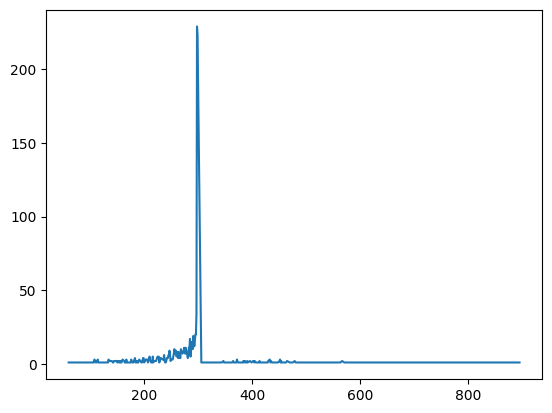

In [81]:
pose_len = pd.Series([pose.shape[0] for pose in raw_poses])
sorted = pose_len.value_counts().sort_index()
plt.plot(sorted.index, sorted.values)

In [82]:
sorted

60     1
65     1
77     1
87     1
89     1
      ..
740    1
756    1
777    1
858    1
896    1
Name: count, Length: 283, dtype: int64

In [87]:
sum(sorted.values[:175])

np.int64(1164)

In [83]:
import cv2
cap = cv2.VideoCapture('../data/videos_clip/0b64b596-c74d-3414-bd11-b5e434f1fa89.mp4')
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
fps = cap.get(cv2.CAP_PROP_FPS)
frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)

In [84]:
width, height, fps, frames

(1280.0, 720.0, 59.61387224332916, 299.0)